In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('train.csv')

In [39]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['EN_POSTED_BY'] = label_encoder.fit_transform(data['POSTED_BY'])
data['EN_ADDRESS'] = label_encoder.fit_transform(data['ADDRESS'])
data['EN_BHK_OR_RK'] = label_encoder.fit_transform(data['BHK_OR_RK'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 12  EN_POSTED_BY           29451 non-null  int32  
 13  EN_ADDRESS             29451 non-null  int32  
 14  EN_BHK_OR_RK           29451 non-null  int32  
dtypes:

In [43]:
data = data.drop(['POSTED_BY' , 'BHK_OR_RK' , 'ADDRESS'] , axis = 1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   SQUARE_FT              29451 non-null  float64
 4   READY_TO_MOVE          29451 non-null  int64  
 5   RESALE                 29451 non-null  int64  
 6   LONGITUDE              29451 non-null  float64
 7   LATITUDE               29451 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 9   EN_POSTED_BY           29451 non-null  int32  
 10  EN_ADDRESS             29451 non-null  int32  
 11  EN_BHK_OR_RK           29451 non-null  int32  
dtypes: float64(4), int32(3), int64(5)
memory usage: 2.4 MB


<Axes: >

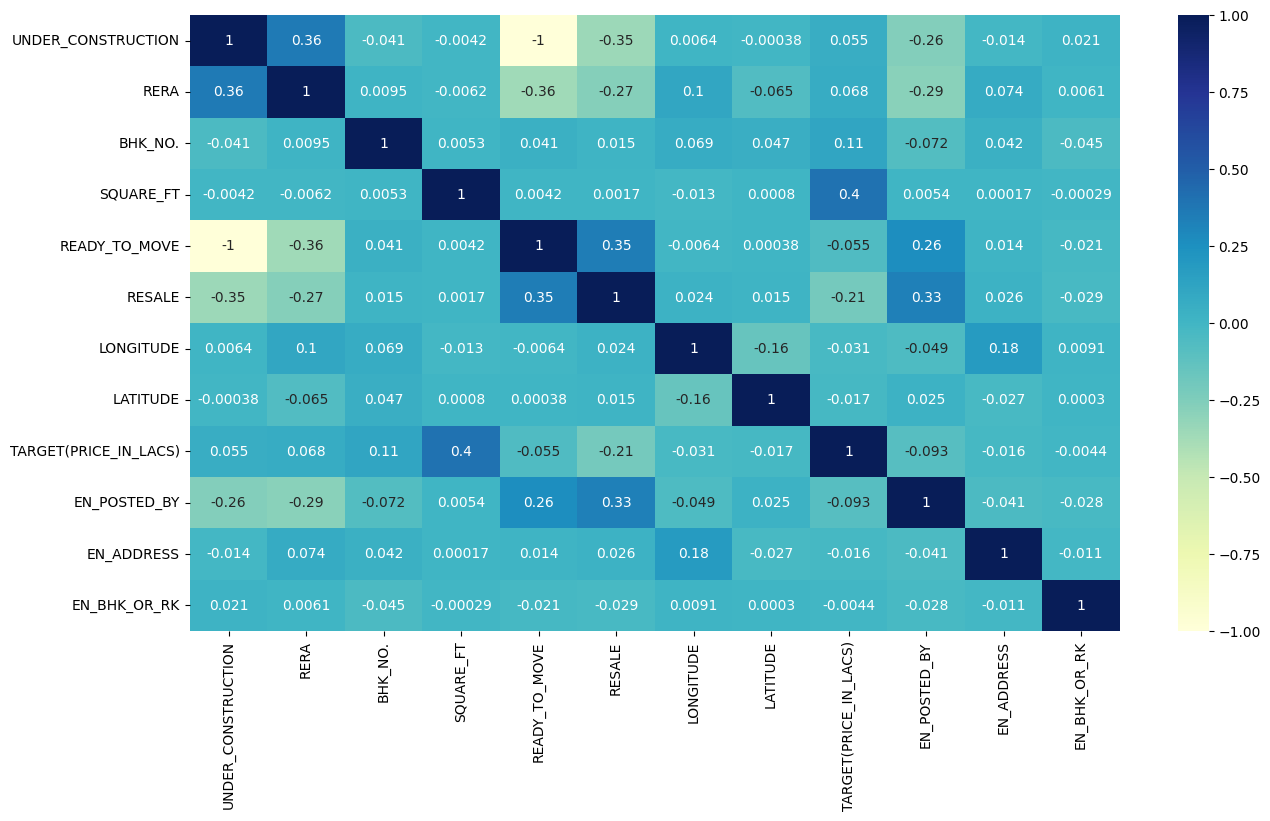

In [45]:
plt.figure(figsize = (15,8))

sns.heatmap(data.corr() , annot = True , cmap = 'YlGnBu')

array([[<Axes: title={'center': 'UNDER_CONSTRUCTION'}>,
        <Axes: title={'center': 'RERA'}>,
        <Axes: title={'center': 'BHK_NO.'}>],
       [<Axes: title={'center': 'SQUARE_FT'}>,
        <Axes: title={'center': 'READY_TO_MOVE'}>,
        <Axes: title={'center': 'RESALE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'TARGET(PRICE_IN_LACS)'}>],
       [<Axes: title={'center': 'EN_POSTED_BY'}>,
        <Axes: title={'center': 'EN_ADDRESS'}>,
        <Axes: title={'center': 'EN_BHK_OR_RK'}>]], dtype=object)

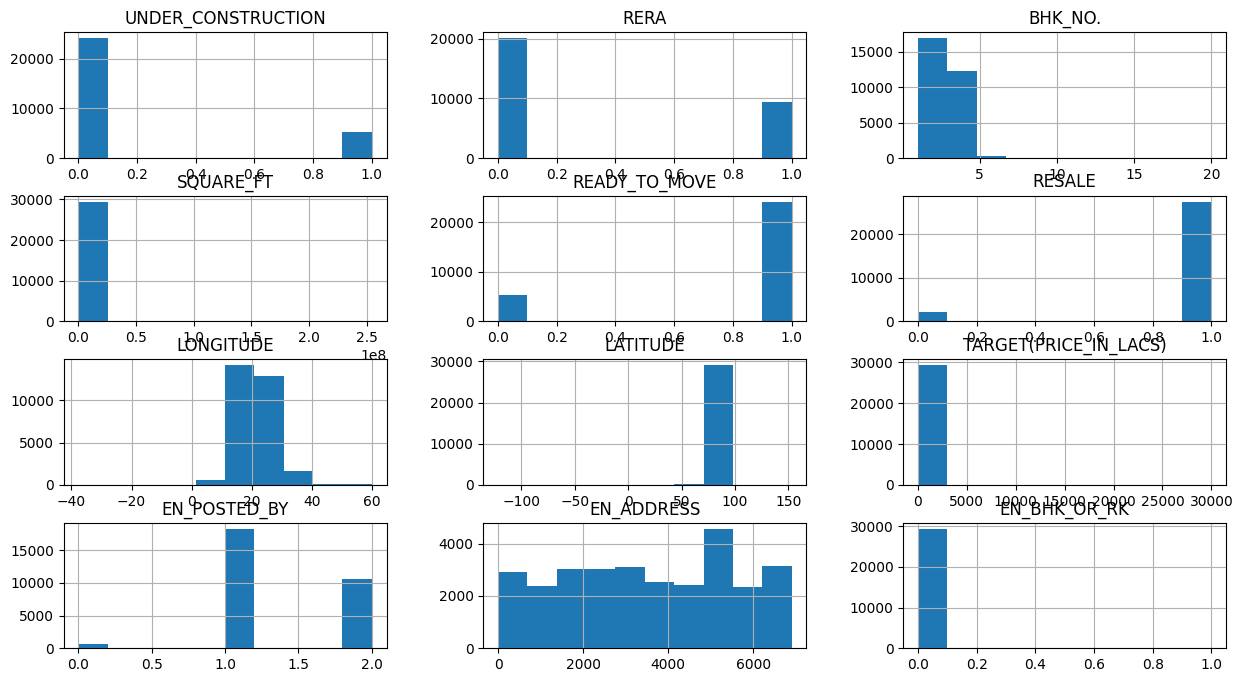

In [46]:
data.hist(figsize =(15,8))

In [47]:
data['BHK_NO.'] = np.log(data['BHK_NO.'] + 1)
data['SQUARE_FT'] = np.log(data['SQUARE_FT'] + 1)
data['UNDER_CONSTRUCTION'] = np.log(data['UNDER_CONSTRUCTION'] + 1)
data['RERA'] = np.log(data['RERA'] + 1)

array([[<Axes: title={'center': 'UNDER_CONSTRUCTION'}>,
        <Axes: title={'center': 'RERA'}>,
        <Axes: title={'center': 'BHK_NO.'}>],
       [<Axes: title={'center': 'SQUARE_FT'}>,
        <Axes: title={'center': 'READY_TO_MOVE'}>,
        <Axes: title={'center': 'RESALE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'TARGET(PRICE_IN_LACS)'}>],
       [<Axes: title={'center': 'EN_POSTED_BY'}>,
        <Axes: title={'center': 'EN_ADDRESS'}>,
        <Axes: title={'center': 'EN_BHK_OR_RK'}>]], dtype=object)

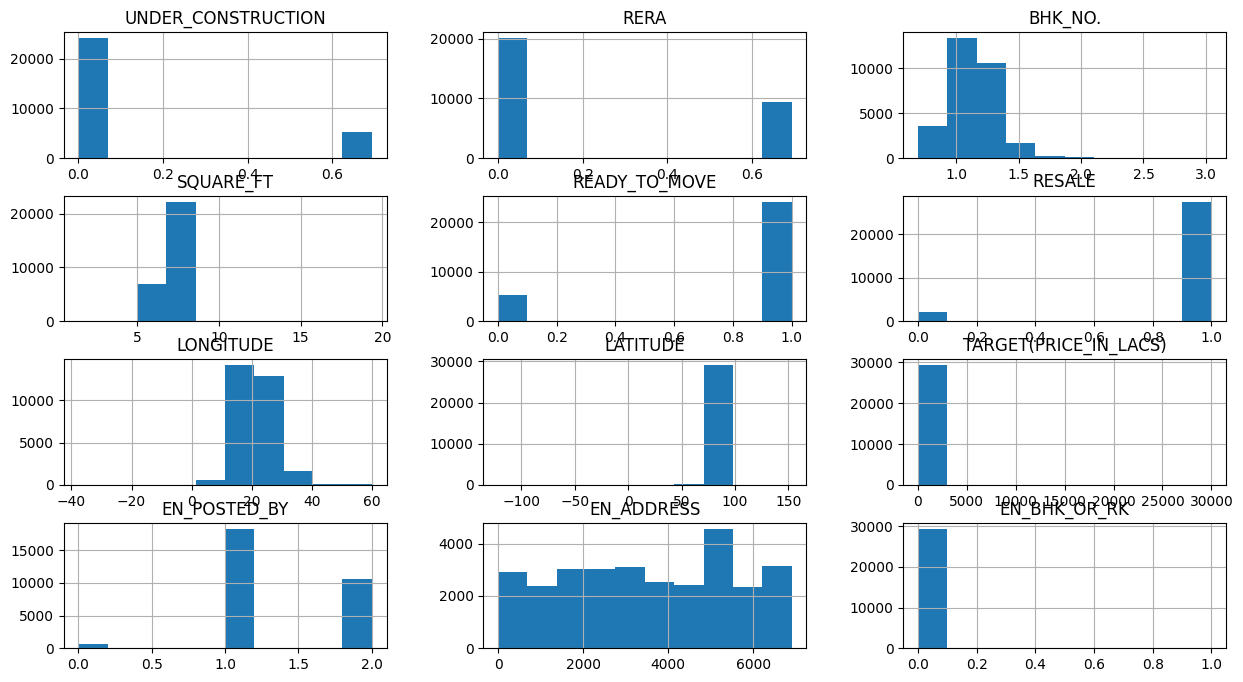

In [48]:
data.hist(figsize =(15,8))

In [49]:
data['BHK_NO.'] = np.log(data['BHK_NO.'] + 1)
data['SQUARE_FT'] = np.log(data['SQUARE_FT'] + 1)
data['UNDER_CONSTRUCTION'] = np.log(data['UNDER_CONSTRUCTION'] + 1)
data['RERA'] = np.log(data['RERA'] + 1)

array([[<Axes: title={'center': 'UNDER_CONSTRUCTION'}>,
        <Axes: title={'center': 'RERA'}>,
        <Axes: title={'center': 'BHK_NO.'}>],
       [<Axes: title={'center': 'SQUARE_FT'}>,
        <Axes: title={'center': 'READY_TO_MOVE'}>,
        <Axes: title={'center': 'RESALE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'TARGET(PRICE_IN_LACS)'}>],
       [<Axes: title={'center': 'EN_POSTED_BY'}>,
        <Axes: title={'center': 'EN_ADDRESS'}>,
        <Axes: title={'center': 'EN_BHK_OR_RK'}>]], dtype=object)

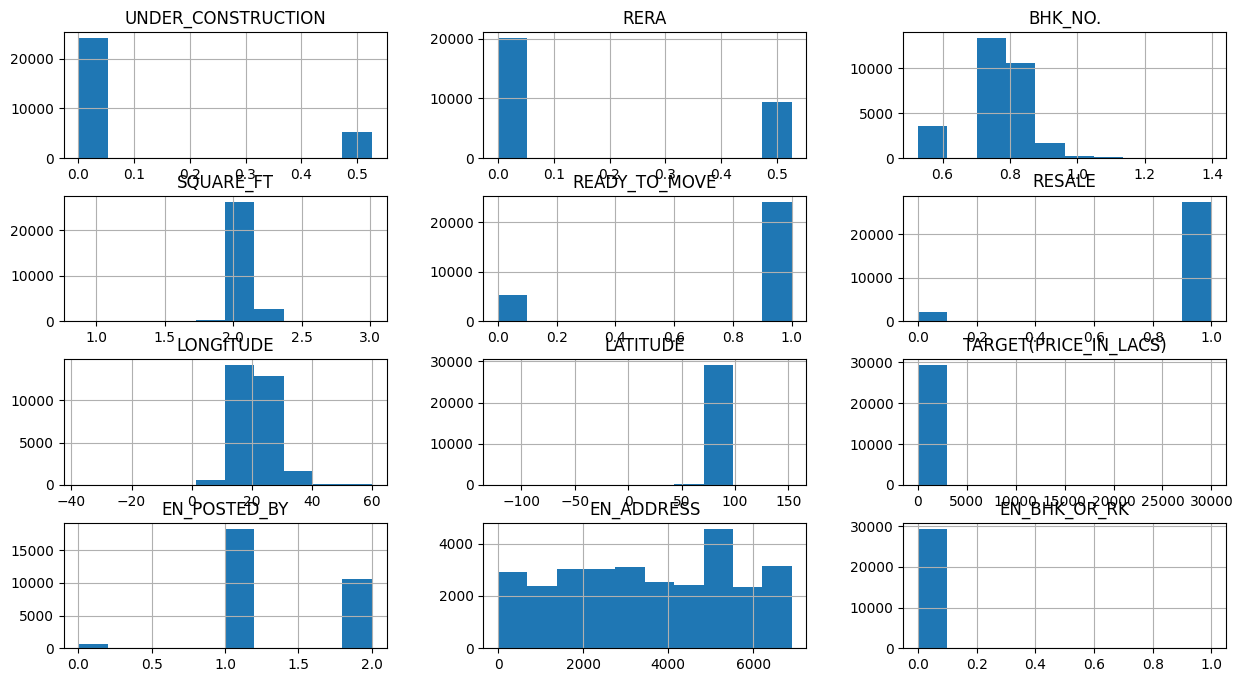

In [50]:
data.hist(figsize = (15,8))

In [51]:


x = data.drop(['TARGET(PRICE_IN_LACS)'] , axis = 1)
y = data['TARGET(PRICE_IN_LACS)']



In [52]:
x_train , x_test ,y_train ,  y_test = train_test_split(x , y , test_size = 0.2)

In [53]:
train_data = x_train.join(y_train)

In [54]:
train_data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,EN_POSTED_BY,EN_ADDRESS,EN_BHK_OR_RK,TARGET(PRICE_IN_LACS)
6895,0.526589,0.526589,0.959135,2.157045,0,1,30.662283,76.822397,1,6708,0,81.0
28348,0.000000,0.000000,0.741276,2.097173,1,1,28.874383,77.113251,2,2878,0,36.3
23973,0.000000,0.000000,0.869742,2.113347,1,1,21.159018,79.085738,1,3405,0,100.0
13577,0.000000,0.526589,0.741276,2.060408,1,1,12.969910,77.597960,1,3508,0,48.0
2022,0.526589,0.526589,0.741276,2.079256,0,1,18.097689,74.735239,1,564,0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9714,0.000000,0.000000,0.741276,2.042606,1,1,12.296183,76.594249,2,886,0,29.5
20078,0.000000,0.526589,0.741276,2.079970,1,1,28.629811,77.434197,2,1236,0,35.0
22056,0.000000,0.000000,0.741276,2.079944,1,1,22.241240,73.200301,2,3149,0,21.0
20992,0.000000,0.000000,0.741276,2.045703,1,1,27.182124,77.969927,2,5565,0,21.0


In [55]:
from sklearn.linear_model import LinearRegression


#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

X_train , y_train = train_data.drop(['TARGET(PRICE_IN_LACS)'],axis = 1),train_data['TARGET(PRICE_IN_LACS)']


#X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [56]:
test_data = (x_test).join(y_test)

In [57]:
X_test , y_test = test_data.drop(['TARGET(PRICE_IN_LACS)'],axis = 1),test_data['TARGET(PRICE_IN_LACS)']

In [58]:
reg.score(X_test , y_test)

0.43485701050673775

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
forest.score(X_test,y_test)

0.9525330571131135

In [25]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],   
    "max_depth": [None, 4, 8],
    "max_features": [None, 'sqrt', 'log2']  # Corrected max_features values
}
grid_search = GridSearchCV(forest , param_grid , cv = 5 , scoring = "neg_mean_squared_error" , return_train_score = True)

grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
grid_search.best_estimator_

RandomForestRegressor(max_features=None, n_estimators=300)

In [27]:
grid_search.best_estimator_.score(X_test , y_test)

0.9616798095994821

In [61]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb.score(X_test,y_test)

0.8718557159915961

In [33]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor()

# Define the hyperparameters distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [3, 5, 7, 9, 11],               # Maximum depth of each tree
    'learning_rate': [0.05, 0.1, 0.15, 0.2],     # Learning rate
    'gamma': [0, 0.1, 0.2, 0.3],                 # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],      # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],# Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.2, 0.3],             # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.3]             # L2 regularization term on weights
}


random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3],
                                        'reg_lambda': [0, 0.1, 0.2, 0.3],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2')

In [34]:
random_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.1,
 'reg_alpha': 0.2,
 'n_estimators': 500,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [35]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
random_search.best_estimator_.score(X_test , y_test)

0.9829672224082391